<a href="https://colab.research.google.com/github/jihunni/numerical_optimization/blob/main/Numerical_Optimization_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seeking initial bound
Assume function f(x) is a unimodal funciton.

In [ ]:
def seeking_bound(unimodal_function, initial_point_range=50, step_size=5, PRINT=False):
  '''
  input
  - initial_point_range : [float] random initial range (i.e. - abs(initial_point_range) <= x_0 < - abs(initial_point_range) )
  - step_size : [positive float] step size
  --------------------------------
  output
  - a : [float]
  - b : [float]
  - num_iteration : [integer]
  - time : [float]
  '''
  
  print('seeking initial bound')
  #set parameter to meausre the performance
  import time
  num_iteration = 0
  start_time = time.time()

  #import library to draw 
  import matplotlib.pyplot as plt

  #check parameter
  if (step_size <= 0):
    print("ERROR : check step_size")

  # select random initial point x_0
  import random
  x_0 = random.random() * initial_point_range
  print('initial point : ', x_0)

  # set step size
  d_0 = step_size

  # evaluate function f
  f_minus = unimodal_function(x_0 - step_size)
  f = unimodal_function(x_0)
  f_plus = unimodal_function(x_0 + step_size)

  if (f_minus >= f and f >= f_plus):
    # set parameter
    d = d_0
    x_1 = x_0 - d_0
    x_2 = x_0
    x_3 = x_0 + d_0
    if (PRINT) : print("type 1")
    #iteration
    while(True):
      num_iteration += 1
      x_1 = x_2
      x_2 = x_3
      x_3 = x_2 + d * 2 ** num_iteration

      if(unimodal_function(x_3) >= unimodal_function(x_2)):
        break
    
    end_time = time.time()
    plt.plot(range(int(x_1)-1, int(x_3)+1), [unimodal_function(k) for k in range(int(x_1)-1, int(x_3)+1)]) #draw plot (validation)
    print('x_1: ', x_1, '\tx_3: ', x_3, '\tnum_iteration: ',num_iteration, '\ttime: ',time.time() - start_time)
    print('f(x_2) : ', unimodal_function(x_2), '\tf(x_3) : ', unimodal_function(x_3))
    return x_1, x_3,num_iteration, end_time - start_time

  elif (f_minus <= f and f <= f_plus):
    # set parameter
    d = -d_0
    x_1 = x_0 + d_0
    x_2 = x_0
    x_3 = x_0 - d_0
    if (PRINT) : print("type 2")
    #iteration
    while(True):
      num_iteration += 1
      x_1 = x_2
      x_2 = x_3
      x_3 = x_2 + d * 2 ** num_iteration

      if(unimodal_function(x_3) >= unimodal_function(x_2)):
        break
    end_time = time.time()
    plt.plot(range(int(x_3)-1, int(x_1)+1), [unimodal_function(k) for k in range(int(x_3)-1, int(x_1)+1)]) #draw plot (validation)
    print('x_1: ', x_3, '\tx_3: ', x_1, '\tnum_iteration: ',num_iteration, '\ttime: ', end_time - start_time) 
      #x_1 and x_2 are interchanged to place in the order
    print('f(x_2) : ', unimodal_function(x_2), '\tf(x_3) : ', unimodal_function(x_3))
    return x_3, x_1, num_iteration, time.time() - start_time     

  elif (f_minus >= f and f <= f_plus) : 
    end_time = time.time()
    #print('f(x_2) : ', unimodal_function(x_2), '\tf(x_3) : ', unimodal_function(x_3))
    if PRINT : print("type 3")
    plt.plot(range(int(x_0 - step_size)-1, int(x_0 + step_size)+1), [unimodal_function(k) for k in range(int(x_0 - step_size)-1, int(x_0 + step_size)+1)]) #draw plot (validation)
    print('x_1: ', x_0 - step_size, '\tx_3: ', x_0 + step_size, '\tnum_iteration: ', num_iteration, '\ttime: ',time.time() - start_time)
    return x_0 - step_size, x_0 + step_size, num_iteration, end_time - start_time

  else:
    print("ERROR! check range")


example

In [ ]:
def function_1(x):
  return 32312 * (x-3.15) * (x+17.15) * (x+100000)

seeking initial bound
initial point :  13.343481193756363
x_1:  -21.65651880624364 	x_3:  8.343481193756363 	num_iteration:  2 	time:  0.0011951923370361328
f(x_2) :  -240622536831.1443 	f(x_3) :  361140992306.3588


(-21.65651880624364, 8.343481193756363, 2, 0.031032800674438477)

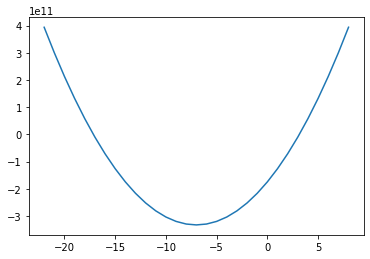

In [ ]:
seeking_bound(function_1)

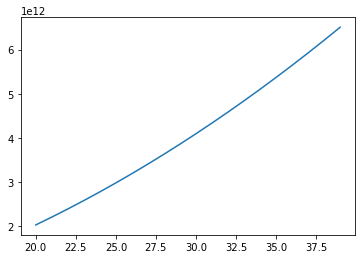

In [ ]:
import matplotlib.pyplot as plt
a = 20
b = 40
plt.plot(range(a,b), [function_1(k) for k in range(a,b)])

# Fibonacci search

In [ ]:
def fibonacci_search(unimodal_function, a_input, b_input, num_iteration=30):
  '''
  input
  - unimodal_function : [function]
  - a_input : [float]
  - b_input : [float] (a<b)
  - num_iteration : [integer]
  ------------
  output
  '''
  print('fibonacci search')
  # to measure time
  import time
  start_time = time.time()

  # check
  if(a_input >= b_input):
    print("ERROR")
  
  # to generate Fibonacci numbers
  F = [0] * (num_iteration+1)
  F[0] = 1
  F[1] = 1
  for k in range(2, num_iteration+1):
    F[k] = F[k-1] + F[k-2]

  # initial parameter for while loop
  N = num_iteration
  a = a_input
  b = b_input

  while(N != 1) :
    # choose two interior points x_1 and x_2
    x_1 = a + F[N-2]/F[N] * (b-a)
    x_2 = b - F[N-2]/F[N] * (b-a)

    #compute f(x_1) and f(x_2)
    if (unimodal_function(x_1) >= unimodal_function(x_2)) :
      a = x_1
    if (unimodal_function(x_1) < unimodal_function(x_2)) :
      b = x_2

    # to update an iteration parameter
    N -= 1
  # to measure time
  end_time = time.time()
  final_length_of_interval = abs(1 / F[num_iteration] * (unimodal_function(b_input) - unimodal_function(a_input)))

  # output
  #print('\ttime: ', end_time - start_time)
  print("final length of interval : ", final_length_of_interval)
  return a, b, end_time - start_time

In [ ]:
def fibonacci_search_with_seeking_bound(unimodal_function, num_iteration_search):
  a, b, num_iteration_seek, time_seek = seeking_bound(unimodal_function)
  a, b, time_search = fibonacci_search(unimodal_function, a, b, num_iteration_search)
  return a, b, num_iteration_seek + num_iteration_search, time_seek + time_search

example

seeking initial bound
initial point :  18.829509634347886
x_1:  -56.170490365652114 	x_3:  3.829509634347886 	num_iteration:  3 	time:  0.0008687973022460938
f(x_2) :  -61139300248.87571 	f(x_3) :  7475104726393.215
fibonacci search
final length of interval :  2.0660363844000059e-50


(-6.999484802397934, -6.999484802397933, 303, 0.018329143524169922)

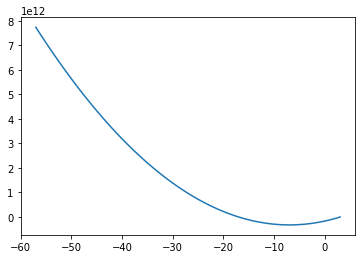

In [ ]:
fibonacci_search_with_seeking_bound(function_1, 300)

# Golden section search

In [ ]:
def golden_section_search(unimodal_function, a_input, b_input, num_iteration=30):
  '''
  input
  - unimodal_function : [function]
  - a_input : [float]
  - b_input : [float] (a<b)
  - num_iteration : [integer]
  ------------
  output
  '''
  print('golden section search')
  # to measure time
  import time
  start_time = time.time()

  # golden section ratio, tau
  import math
  tau = (math.sqrt(5)-1)/2

  # check
  if(a_input >= b_input):
    print("ERROR")

  # initial parameter for while loop
  N = num_iteration
  a = a_input
  b = b_input

  while(N != 1) :
    # choose two interior points x_1 and x_2
    x_1 = a + tau * (b-a)
    x_2 = b - tau * (b-a)

    #compute f(x_1) and f(x_2)
    if (unimodal_function(x_1) >= unimodal_function(x_2)) :
      a = x_1
    if (unimodal_function(x_1) < unimodal_function(x_2)) :
      b = x_2

    # to update an iteration parameter
    N -= 1
  # to measure time
  end_time = time.time()
  final_length_of_interval = abs(tau ** (num_iteration-1) * (unimodal_function(b_input)-unimodal_function(a_input)))

  # output
  #print('\ttime: ', end_time - start_time)
  print("final length of interval : ", final_length_of_interval)
  return a, b, end_time - start_time

In [ ]:
def golden_section_search_with_seeking_bound(unimodal_function, num_iteration_search):
  a, b, num_iteration_seek, time_seek = seeking_bound(unimodal_function)
  a, b, time_search = golden_section_search(unimodal_function, a, b, num_iteration_search)
  return a, b, num_iteration_seek + num_iteration_search, time_seek + time_search

example

seeking initial bound
initial point :  7.827186660616675
x_1:  -27.172813339383325 	x_3:  2.8271866606166753 	num_iteration:  2 	time:  6.532669067382812e-05
f(x_2) :  -332765933596.8388 	f(x_3) :  981759130415.3293
fibonacci search
final length of interval :  871936.8098715888


(-27.172813339383325, -27.172813339360633, 32, 0.02166581153869629)

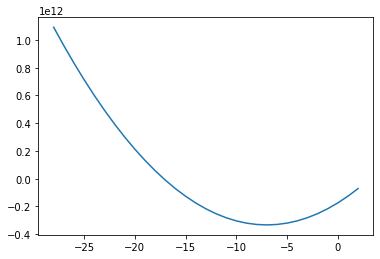

In [ ]:
#test
golden_section_search_with_seeking_bound(function_1, 30)

# Function

# function_1
Let's check whether algorithm works well, or not, with a easy polynomial  


In [ ]:
def function_1(x):
  return 2 * (x-3) **2 * (x-5)**2 

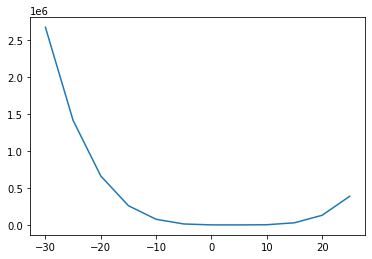

In [ ]:
x = range(-30,30,5)
y = [function_1(k) for k in x]
plt.plot(x, y)

seeking initial bound
initial point :  35.73811276618315
x_1:  -39.26188723381685 	x_3:  20.73811276618315 	num_iteration:  3 	time:  0.0007534027099609375
f(x_2) :  185.8556650726641 	f(x_3) :  6998220.533290478
fibonacci search
final length of interval :  1.1938202436095955e-14


(3.000000000000001, 3.0000000000000013, 103, 0.02210235595703125)

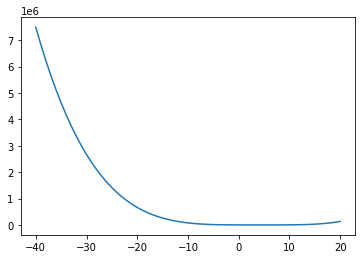

In [ ]:
fibonacci_search_with_seeking_bound(function_1, 100)

seeking initial bound
initial point :  17.615776112713398
x_1:  -17.384223887286602 	x_3:  12.615776112713398 	num_iteration:  2 	time:  0.0003542900085449219
f(x_2) :  1.6783896332562487 	f(x_3) :  416392.0595067966
golden section search
final length of interval :  8.286909073073576e-16


(-17.384223887286602, -17.384223887286602, 102, 0.02256917953491211)

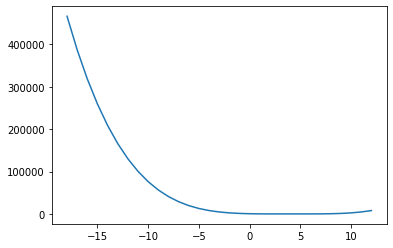

In [ ]:
golden_section_search_with_seeking_bound(function_1, 100)

# function 2
what if function is symmetric?

In [ ]:
def function_2(x) : 
    import numpy as np
    return np.log(abs(x)) * np.cos(x) / np.exp(abs(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


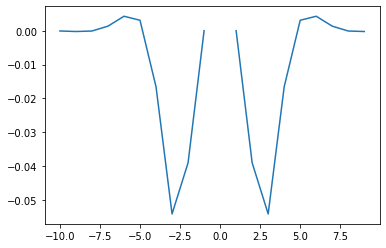

In [ ]:
x = range(-10,10,1)
y = [function_2(k) for k in x]
plt.plot(x, y)

seeking initial bound
initial point :  8.656471311947488
x_1:  -6.343528688052512 	x_3:  8.656471311947488 	num_iteration:  1 	time:  0.002432584762573242
f(x_2) :  -0.029139486632809707 	f(x_3) :  0.0032420411498499456
fibonacci search
final length of interval :  3.946165399081418e-05


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


(0.06096569396995985, 0.22950501981265647, 11, 0.023118972778320312)

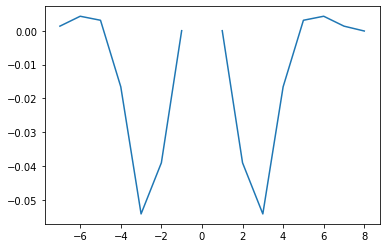

In [ ]:
fibonacci_search_with_seeking_bound(function_2, 10)

seeking initial bound
initial point :  0.8864201743239486
x_1:  -4.113579825676052 	x_3:  5.886420174323948 	num_iteration:  0 	time:  0.021157026290893555
golden section search
final length of interval :  0.0002311872510686923


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


(5.540270934120495, 5.542001636837618, 10, 0.0003006458282470703)

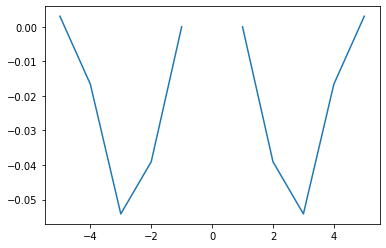

In [ ]:
golden_section_search_with_seeking_bound(function_2, 10)

# function 3
f(x) = - exp(x) * cos(x)  
A function has one global minima

In [ ]:
def function_3(x) : 
  import numpy as np
  return np.exp(x) * np.cos(x)

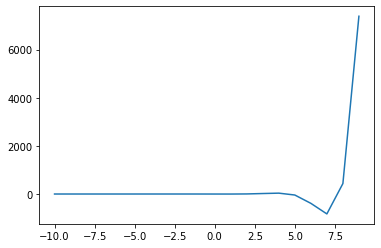

In [ ]:
x = range(-10,10,1)
y = [-function_3(k) for k in x]
plt.plot(x, y)

seeking initial bound
initial point :  34.819039078260104
x_1:  34.819039078260104 	x_3:  49.819039078260104 	num_iteration:  1 	time:  0.019562959671020508
f(x_2) :  -1.025214196380635e+17 	f(x_3) :  3.9024264204459814e+21
fibonacci search
final length of interval :  0.05535945423740337


(41.62610266843683, 41.62610266843683, 111, 0.002497434616088867)

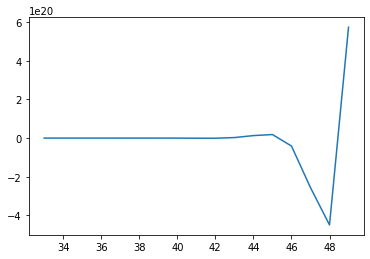

In [ ]:
fibonacci_search_with_seeking_bound(function_3, 110)

seeking initial bound
initial point :  45.266778092081495
x_1:  30.266778092081495 	x_3:  45.266778092081495 	num_iteration:  1 	time:  0.00011277198791503906
f(x_2) :  -2.5810880567154694e+17 	f(x_3) :  5710824997051.253
golden section search
final length of interval :  0.026316618879184715


(32.21133003566273, 32.21133003566273, 101, 0.023107290267944336)

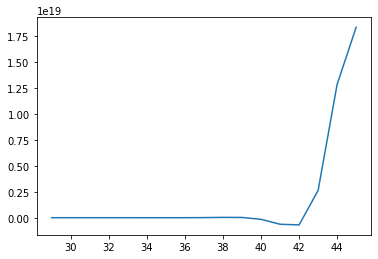

In [ ]:
golden_section_search_with_seeking_bound(function_3, 100)

# function 4
What if there is no root in a function?  
f(x) = exp(x)  
root does not exist  

In [ ]:
def function_4(x) : 
  import numpy as np
  return np.exp(x)

seeking initial bound
initial point :  25.151618569222205
x_1:  -2529.848381430778 	x_3:  -609.8483814307779 	num_iteration:  8 	time:  0.0012395381927490234
f(x_2) :  0.0 	f(x_3) :  0.0
fibonacci search
final length of interval :  1.509937056705011e-286


(-745.1332191019412, -745.1332191019411, 109, 0.026900053024291992)

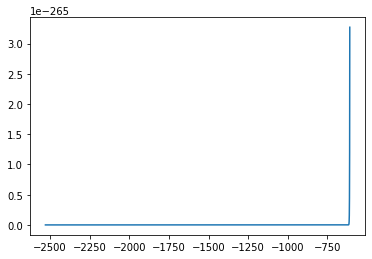

In [ ]:
fibonacci_search_with_seeking_bound(function_4, 101)

seeking initial bound
initial point :  34.96586501766429
x_1:  -2520.0341349823357 	x_3:  -600.0341349823357 	num_iteration:  8 	time:  0.0009326934814453125
f(x_2) :  0.0 	f(x_3) :  0.0
golden section search
final length of interval :  5.232507250923378e-282


(-600.0341349823357, -600.0341349823357, 108, 0.022692203521728516)

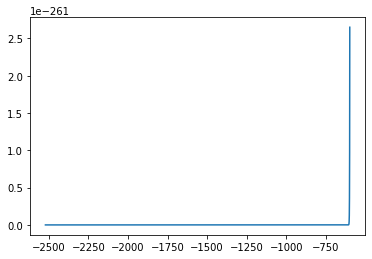

In [ ]:
golden_section_search_with_seeking_bound(function_4, 100)

# conclusion
- Fibonacci search and Golden section search is the method for finding local minimun. If an input interval of each serach has multiple local optimum point, each method can converge into different local mininum. The local optimum to converge is determined by initial point. (check Function_1)
- Generally, Golden section search has more smaller output interval and shorter running time than Fibonacci search. (check Function 1 and Function 3). But it is not true in case of samll iteration. (check Function 2)
- If increasing function is given to interval seek search algorithm, Fibonacci search and Golden section search algorithm, then the algorithm onputs non-sensible results such as the end point that computer caculates. It implies that property and character of an input function is crucial. (check Function_4)
